In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [50]:
X, y = make_blobs(n_samples=300, n_features=2,centers=2, cluster_std=1.05, random_state=40)
y = np.where(y==0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=700):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [52]:
model = SVM()
model.fit(X_train, y_train)

In [53]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


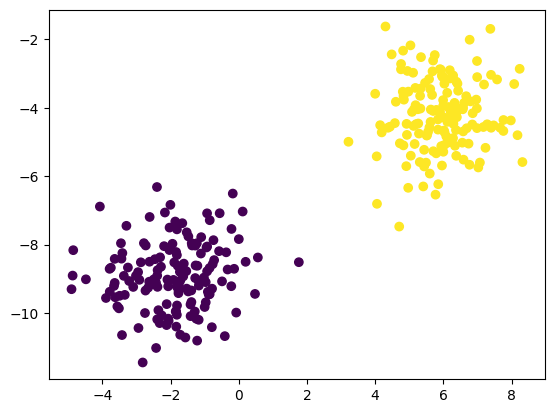

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()